In [158]:
##Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

# Credit Card Fraud Detection

In [62]:
data = pd.read_csv("creditcard.csv")

In [63]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [64]:
data = data.dropna()

In [65]:
X = data[data.columns[1:30]]
y = data['Class']

In [66]:
data['Class'].sum()

492

Logistic Regression

In [133]:
sampling_strategy = {0: 50000, 1: 100}
X_train, y_train = make_imbalance(X, y, sampling_strategy=sampling_strategy, random_state=17)

In [134]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_scaled)

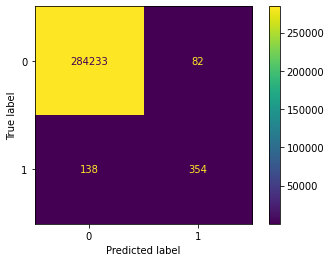

In [135]:
arr =confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(arr).plot()

In [121]:
precision_score(y,y_pred)

0.8119266055045872

In [122]:
recall_score(y, y_pred)

0.7195121951219512

In [123]:
f1_score(y,y_pred)

0.7629310344827585

In [124]:
y_scores = cross_val_predict(lr, X_scaled, y.values.ravel(), method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

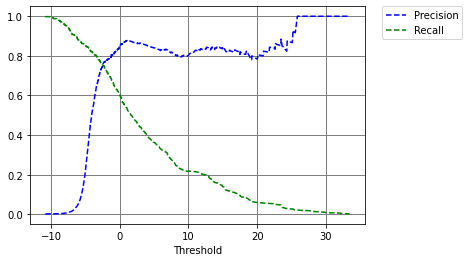

In [125]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

SVM

In [67]:
sampling_strategy = {0: 50000, 1: 100}
X_train, y_train = make_imbalance(X, y, sampling_strategy=sampling_strategy, random_state=7)

In [68]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)

In [69]:
svm_clf1 = LinearSVC(C=1,loss="hinge",random_state=27)
svm_clf2 = LinearSVC(C=100,loss="hinge",random_state=13)

In [70]:
scaled_svm_clf1 = Pipeline([
                            ("scaler",scaler),
                            ("linear_svc",svm_clf1),
])
scaled_svm_clf2 = Pipeline([
                            ("scaler",scaler),
                            ("linear_svc",svm_clf2),
])

In [71]:
scaled_svm_clf1.fit(X_train_scaled,y_train)
scaled_svm_clf2.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=13))])

In [72]:
precision_score(y,scaled_svm_clf1.predict(X_scaled))

0.8458049886621315

In [73]:
recall_score(y,scaled_svm_clf1.predict(X_scaled))

0.758130081300813

In [74]:
f1_score(y,scaled_svm_clf1.predict(X_scaled))

0.7995712754555198

In [75]:
precision_score(y,scaled_svm_clf2.predict(X_scaled))

0.866822429906542

In [76]:
recall_score(y,scaled_svm_clf2.predict(X_scaled))

0.7540650406504065

In [77]:
f1_score(y,scaled_svm_clf2.predict(X_scaled))

0.8065217391304348

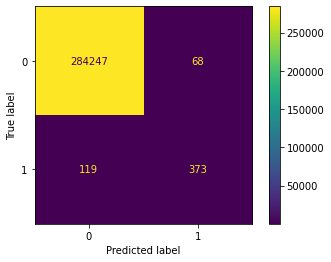

In [78]:
arr =confusion_matrix(y, scaled_svm_clf1.predict(X_scaled))
ConfusionMatrixDisplay(arr).plot()

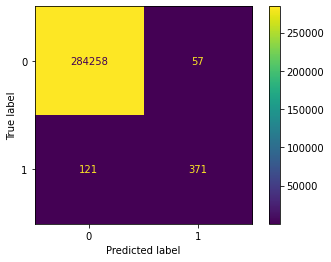

In [79]:
arr =confusion_matrix(y, scaled_svm_clf2.predict(X_scaled))
ConfusionMatrixDisplay(arr).plot()

Decision Tree

In [27]:
sampling_strategy = {0: 50000, 1: 100}
X_train, y_train = make_imbalance(X, y, sampling_strategy=sampling_strategy, random_state=12)

In [28]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)

In [30]:
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=33)
tree_clf.fit(X_scaled,y)

DecisionTreeClassifier(max_depth=2, random_state=33)

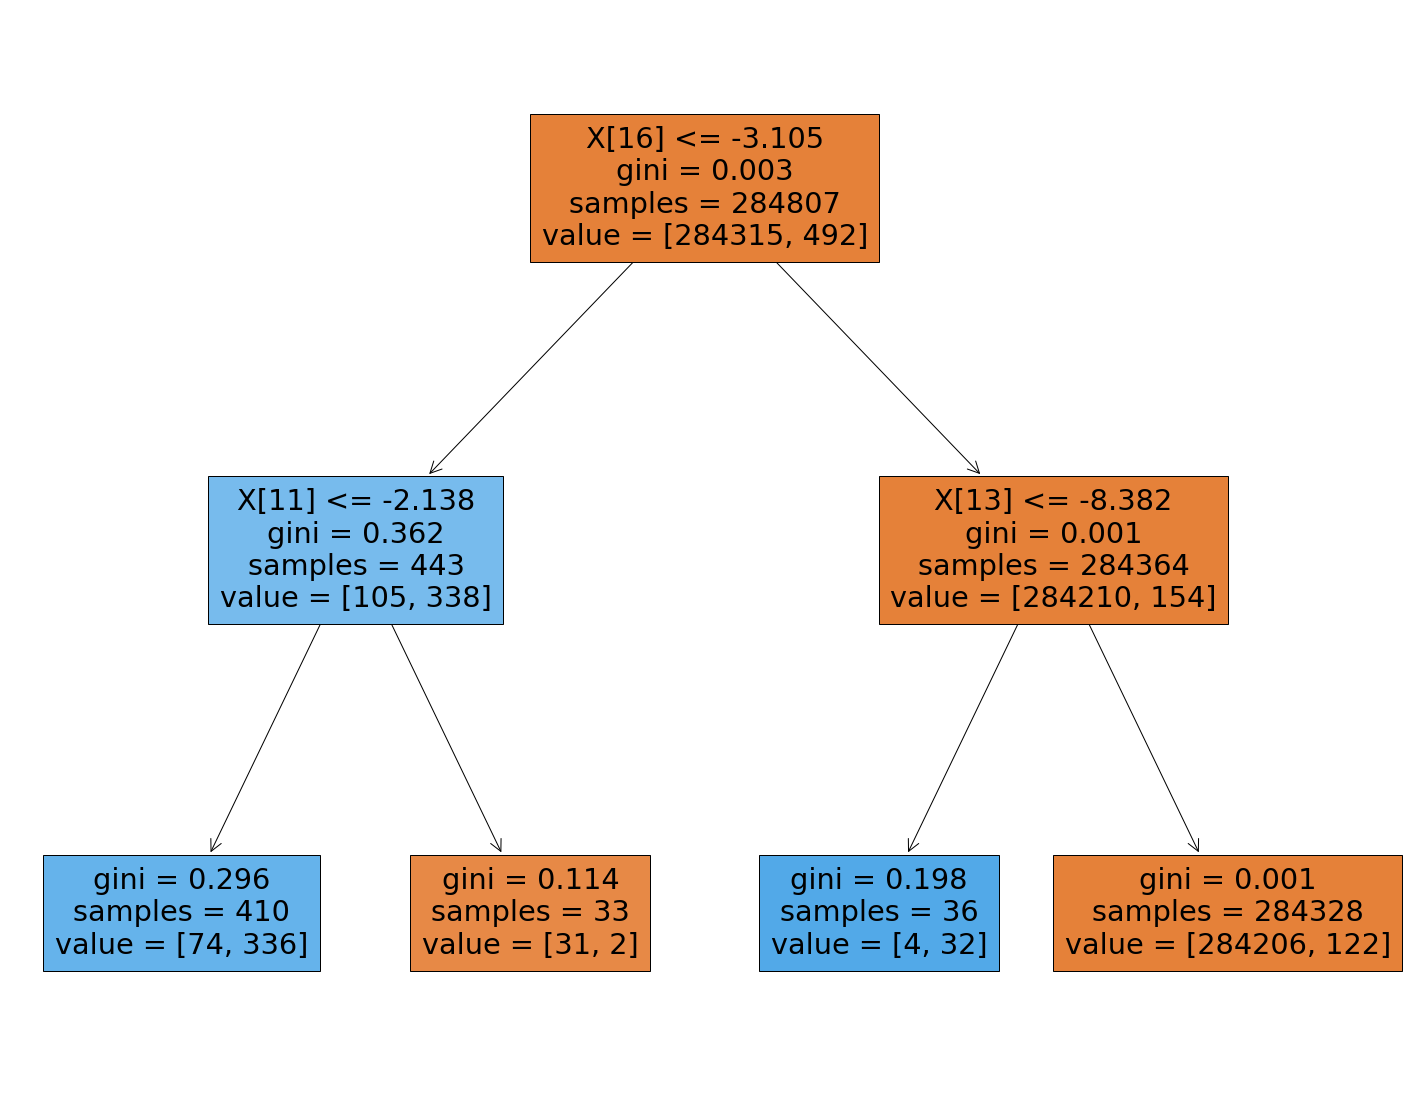

In [31]:
fig = plt.figure(figsize=(25,20)) 
_= plot_tree(tree_clf,filled=True)

In [36]:
precision_score(y,tree_clf.predict(X_scaled))

0.8251121076233184

In [37]:
recall_score(y,tree_clf.predict(X_scaled))

0.7479674796747967

In [38]:
f1_score(y,tree_clf.predict(X_scaled))

0.7846481876332623

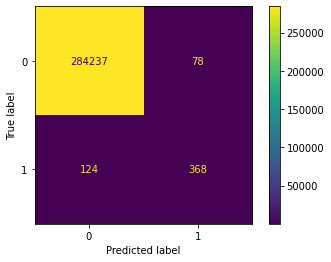

In [39]:
arr =confusion_matrix(y, tree_clf.predict(X_scaled))
ConfusionMatrixDisplay(arr).plot()

Voting Classifier (logistic, random forest, scv, and decision tree)

In [45]:
sampling_strategy = {0: 50000, 1: 100}
X_train, y_train = make_imbalance(X, y, sampling_strategy=sampling_strategy, random_state=72)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)

In [42]:
log_clf = LogisticRegression(solver="lbfgs",random_state=842)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=729)
svm_clf = SVC(gamma="scale",random_state=17)
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=277)

In [44]:
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf),('tree',tree_clf)],
    voting='hard')

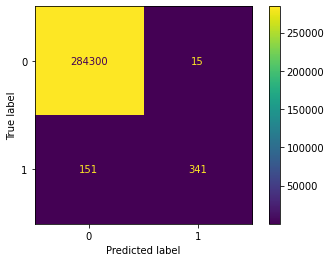

In [49]:
voting_clf.fit(X_train_scaled,y_train)
y_pred = voting_clf.predict(X_scaled)
arr =confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(arr).plot()

In [51]:
precision_score(y,y_pred)

0.9578651685393258

In [52]:
recall_score(y,y_pred)

0.693089430894309

In [54]:
f1_score(y,y_pred)

0.8042452830188679

# Regression

In [83]:
data = pd.read_excel("ENB2012_data.xlsx")

In [84]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [85]:
data = data.dropna()

In [89]:
X = data[data.columns[1:8]]
y = data[['Y1','Y2']]

Linear Regression

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=43)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)

In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [112]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 2549387.98
Coefficient of determination: -25731.47


Polynomial Fit

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=2/3,random_state=89)
scaler = preprocessing.StandardScaler().fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [173]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)

LinearRegression()

In [174]:
X_test_poly = poly_features.transform(X_test)
y_val_predict = lin_reg.predict(X_test_poly)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_val_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_val_predict))

Mean squared error: 12.84
Coefficient of determination: 0.86


This is very good!!

In [177]:
lin_reg.score(X_poly,y_train)

0.8747858187976478

In [178]:
lin_reg.score(X_test_poly,y_test)

0.8647747996674913

SVR

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=2/3,random_state=166)

In [145]:
regr1 = make_pipeline(preprocessing.StandardScaler(), SVR(C=1.0,epsilon=0.2))
regr2 = make_pipeline(preprocessing.StandardScaler(), SVR(C=1.0,epsilon=0.2))

In [152]:
regr1.fit(X_train,y_train['Y1'])
regr2.fit(X_train,y_train['Y2'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [154]:
y_val_predict = regr1.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test['Y1'], y_val_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test['Y1'], y_val_predict))

Mean squared error: 10.83
Coefficient of determination: 0.89


In [183]:
regr1.score(X_test,y_test['Y1'])

0.892730844911784

In [184]:
regr1.score(X_train,y_train['Y1'])

0.8941722309819155

In [155]:
y_val_predict = regr2.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test['Y2'], y_val_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test['Y2'], y_val_predict))

Mean squared error: 13.40
Coefficient of determination: 0.85


In [185]:
regr2.score(X_test,y_test['Y1'])

0.8129175907546949

In [186]:
regr2.score(X_train,y_train['Y2'])

0.8652786323024705

Lasso Regression

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
scaler = preprocessing.StandardScaler().fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = Lasso(alpha=1)
reg.fit(X_train,y_train)

Lasso(alpha=1)

In [168]:
reg.score(X_train,y_train)

0.8628705100928021

In [169]:
reg.score(X_test,y_test)

0.8748129212196079

In [171]:
y_val_predict = reg.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_val_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_val_predict))

Mean squared error: 12.32
Coefficient of determination: 0.87
